<a href="https://colab.research.google.com/github/KhaldounN/first-project-/blob/master/Copy_of_Session_1_2_EXERCISES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 1 and Session 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (S1 - S2)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_1_2_EXERCISES.ipynb)

## Exercise 1: CSV

Analize the data of the JetBrains 2017 Python survey https://www.jetbrains.com/research/python-developers-survey-2017/

1. Download raw data from http://jb.gg/pythondevsurvey2017raw
2. Read it in pandas
3. Reproduce "What do you use Python for the most? (single answer)" chart
4. Reproduce "What do you use Python for? (multiple answers)" chart

In [ ]:
#Download raw data from http://jb.gg/pythondevsurvey2017raw
#Read it in pandas
import pandas as pd 
import matplotlib.pyplot as plt


data = pd.read_csv('/content/pythondevsurvey2017_raw_data.csv')
data.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

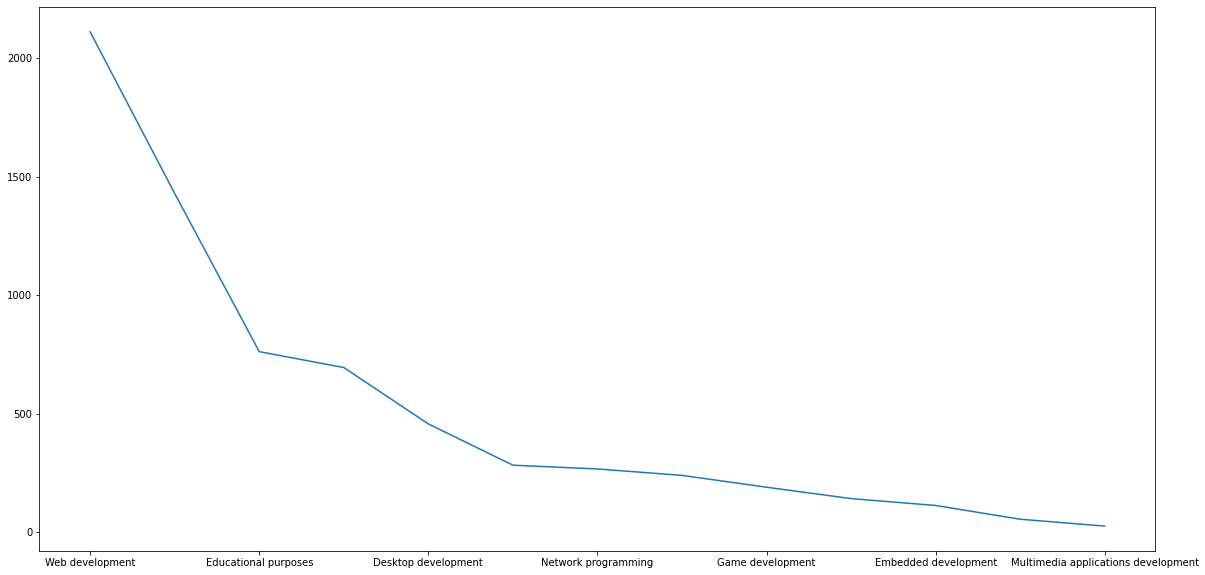

In [ ]:
#Reproduce "What do you use Python for the most? (single answer)" chart

# First : use boolean logic to create a column containing False for single answer and True for mutiple answers

df = data.loc[:,"What do you use Python for the most?"].str.contains('/').fillna(False).to_frame()
df.columns = ['Multi_answer']

#add the created column back to the full data frame 

df_main = pd.concat( [df,data], axis=1)

# create DF for single answer and plot 

df_main_single = df_main[df_main['Multi_answer'] == False]


plt.figure(figsize=(20,10))
df_main_single['What do you use Python for the most?'].value_counts().plot()

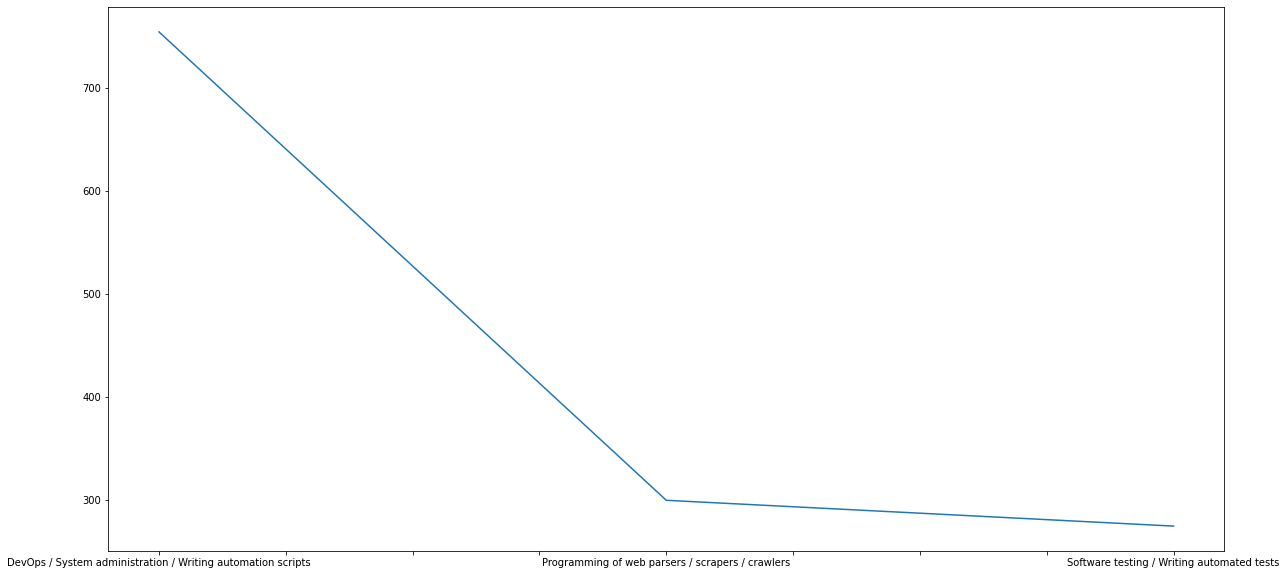

In [ ]:
#Reproduce "What do you use Python for? (multiple answers)" chart

df_main_multi = df_main[df_main['Multi_answer'] == True]


plt.figure(figsize=(20,10))
df_main_multi['What do you use Python for the most?'].value_counts().plot()

# Exercise 2: slicing arrays

Given the array provided in the next cell. Do the following with slicing (check the other notebooks for examples)



*   Print the whole array using slice
*   Print number 12
*   Reverse the array
*   Reverse only one row in the array
*   Slice the first three columns in the array
*   Slice the last three columns and reverse them
*   Slice the last two rows and print them
*   Slice the last integers in a row
*   Slice rows and columns


[Here](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/) some good examples ;-)





In [ ]:
import numpy as np

a = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
nd_a = np.array(a)
nd_a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [ ]:
#Print the whole array using slice
print(nd_a[:])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


In [ ]:
#Print number 12
nd_a[2,1]

12

In [ ]:
#Reverse the array
nd_a[::-1]

array([[16, 17, 18, 19, 20],
       [11, 12, 13, 14, 15],
       [ 6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5]])

In [ ]:
#Reverse only one row in the array
np.flip( nd_a[0:1:])

array([[5, 4, 3, 2, 1]])

In [ ]:
#Slice the first three columns in the array
nd_a[:,0:3]

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

In [ ]:
#Slice the last three columns and reverse them
x = nd_a[::,2:]
x[::,::-1]

array([[ 5,  4,  3],
       [10,  9,  8],
       [15, 14, 13],
       [20, 19, 18]])

In [ ]:
#Slice the last two rows and print them

print(nd_a[-2::,:])

[[11 12 13 14 15]
 [16 17 18 19 20]]


In [ ]:
#Slice the last integers in a row
nd_a[-1::,-3:]

array([[18, 19, 20]])

In [ ]:
#Slice rows and columns. 

data = nd_a.reshape(1,20)
data
# Hi Victor, I am not sure what do you mean by Slic rows and columns 

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]])

# Exercise 3: when is best to bike alone?

Given the bike dataset:

* Download the Dataset using curl
* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * When are the busiest hours per week in Total?
    * Where will you be more comfortable (alone) riding during the week in West or East?
    * What about riding during the business days? When and where are the best hours to ride alone between 06:00 and 10:00? And between 15:00 and 20:00?
    * What happened during the coronavirus pandemic? Did the daily riding hours change? How many riders are passing through the bridge comparing 2018 and 2020?

In [ ]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4248k    0 4248k    0     0   671k      0 --:--:--  0:00:06 --:--:-- 1112k


In [ ]:
#Open the dataset using Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('FremontBridge.csv' , index_col = 'Date' , parse_dates=True )
#Display the DataFrame
data.head()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [ ]:
#When are the busiest hours per week in Total?
# add hour column
data['hour'] = data.index.hour

#groupby hour then sum and sort 
data.groupby(data['hour']).sum().sort_values(by='Fremont Bridge Total' , ascending = False).head()

# answer : busiest hour is 17


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
hour,,,
17,2205760.0,640045.0,1565715.0
8,1823835.0,1073078.0,750757.0
18,1501810.0,508787.0,993023.0
16,1322088.0,473823.0,848265.0
7,1285623.0,796903.0,488720.0


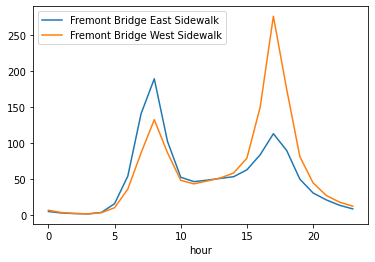

In [ ]:
#Where will you be more comfortable (alone) riding during the week in West or East?


# plot Average traffic during the week by hour to see which is more crowded per hour. 

data.iloc[: , 1:].groupby(by='hour').mean().plot()

# answer : in the East side walk is better during the evening is the least crowded .

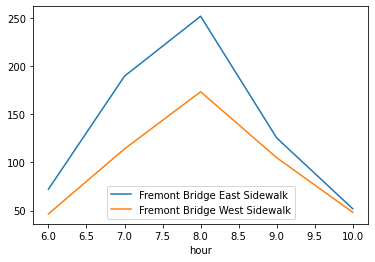

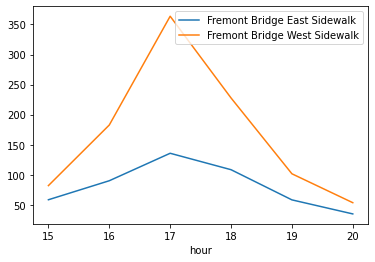

In [ ]:
#What about riding during the business days? When and where are the best hours to ride alone between 06:00 and 10:00? And between 15:00 and 20:00?

#add week day for filtering Business Days : 

data['weekday']  = data.index.weekday

# filter data to business days and calculate average traffic by hour 
newdata = data[ data['weekday'].isin([0,1,2,3,4])].iloc[: , 1:].groupby(by='hour').mean()

#plot traffic from 6 to 10 and from 15 to 20
newdata  = newdata.drop(['weekday'], axis=1)

newdata.iloc[:,0:2][ newdata.index.isin([6,7,8,9,10])].plot()
newdata.iloc[:,0:2][ newdata.index.isin([15,16,17,18,19,20])].plot()
# Answer :  west side is less traffic in 6 - 9  . east side is less traffic 15 to 20 

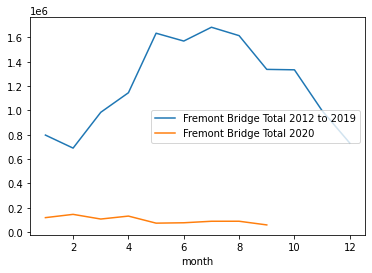

In [ ]:
#What happened during the coronavirus pandemic? Did the daily riding hours change? How many riders are passing through the bridge comparing 2018 and 2020?


# 1 - What happened during the coronavirus pandemic?
#add year & Month Columns 
data['year'] = data.index.year 
data['month'] = data.index.month

# create two data frames ( 2020 and 2012-2019)  then group by Month Total 
df2020 = pd.DataFrame(data[ data['year'] == 2020 ].groupby(by= 'month').sum())
dfall = pd.DataFrame(data[ data['year'] != 2020 ].groupby(by= 'month').sum())

# Merge data frames(2020 & 2012-2019) then plot 
dfall_2020 = pd.concat( [dfall.iloc[:,0:1],df2020.iloc[:,0:1]] , axis=1)
dfall_2020.columns = ('Fremont Bridge Total 2012 to 2019' , 'Fremont Bridge Total 2020')
dfall_2020. plot()




,Fremont Bridge Total
year,
2018,"2,103,760.0"
2020,"883,224.0"


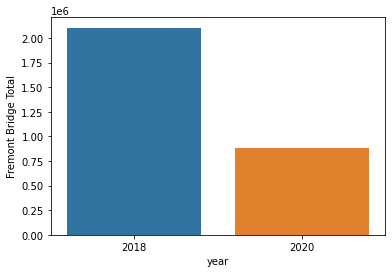

In [ ]:
#How many riders are passing through the bridge comparing 2018 and 2020?
# create two data frames ( 2020 and 2012-2019)  then group by year. the plot to compare 
df2020 = pd.DataFrame(data[ data['year'] == 2020 ].groupby(by= 'year').sum())
df2018 = pd.DataFrame(data[ data['year'] == 2018 ].groupby(by= 'year').sum())

dfall= pd.concat( [df2018.iloc[:,0:1],df2020.iloc[:,0:1]] , axis=0)

sns.barplot(x=dfall.index, y= dfall['Fremont Bridge Total'])
dfall

# Exercise 4: let's get rich!

Given this apple stock history [this dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv)

* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013
    * When was the peak maximum of volume of trades done?
    * When was the month with the lowest close?
    * And the lowest close of the day in the whole dataset?

In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv', index_col='Date', parse_dates=True)
from dateutil import parser
import numpy as np

In [3]:
#Display the DataFrame

data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
#How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013

#Access the closing price to calcualte price for the two periods 
data['date'] = data.index.astype(str)
data['Close'] = data['Close'].astype(int)
df = pd.concat([data[data['date'] == '2000-01-31'] , data[data['date'] == '2012-12-31']] , axis= 0)

#calcualte profite and amount for 10 stocks 
profit =  ((df.iloc[1,5] - df.iloc[0,5] ) * 10).astype(int)
Amount = df.iloc[1,5] * 10 

print( 'Amount' , Amount , "profit" , profit)

Amount 733.1 profit 697


             Open  High    Low  Close      Volume  Adj Close        date
Date                                                                    
2000-09-29  28.19  29.0  25.38     25  1855410200       1.76  2000-09-29


1855410200

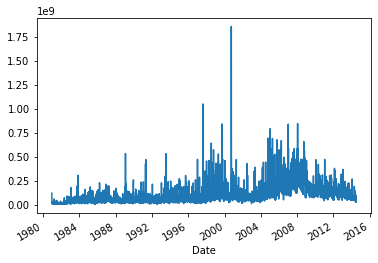

In [5]:
#When was the peak maximum of volume of trades done?
data['Volume'].plot() 
print(data.sort_values(by='Volume' , ascending= False).head(1))

data['Volume'].max()

In [8]:
#when was the month with the lowest close?

data.groupby(by= data.index.month).sum().sort_values(by='Close').head(1)
data.groupby(by= data.index.month).mean().sort_values(by='Close').head(1)
#Answer is july .  according to total close and average close per month 

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
7,90.703215,91.912859,89.478563,90.3101,8.920390e+07,10.62394


In [ ]:
#And the lowest close of the day in the whole dataset?

data.sort_values(by='Close').head(1)